In [ ]:

from _classes import *
from _estimator import *
from sklearn.datasets import make_blobs, make_circles, make_moons
import pandas as pd

# blobs
X_blobs, y_blobs = make_blobs(n_samples=300, centers=3, random_state=42)
X_blobs = pd.DataFrame(X_blobs, columns=["X_1", "X_2"])

# blobs_varied
X_blobs_varied, y_blobs_varied = make_blobs(n_samples=300, centers=3, cluster_std=2, random_state=42)
X_blobs_varied = pd.DataFrame(X_blobs_varied, columns=["X_1", "X_2"])

# circular dataset
X_circle, y_circle = make_circles(n_samples=300, noise=0.1, factor=0.5)
X_circle = pd.DataFrame(X_circle, columns=["X_1", "X_2"])

# two moons dataset
X_moon, y_moon = make_moons(n_samples=300, noise=0.1)
X_moon = pd.DataFrame(X_moon, columns=["X_1", "X_2"])

In [33]:
X = {
    "blobs": X_blobs,
    "blobs_varied": X_blobs_varied,
    "circle": X_circle,
    "moon": X_moon
}

In [34]:
# Initialize the DBSCAN models for each dataset
dbscan_list = {
    "blobs": DBSCAN(min_samples=5),
    "blobs_varied": DBSCAN(min_samples=5),
    "circle": DBSCAN(),
    "moon": DBSCAN()
}

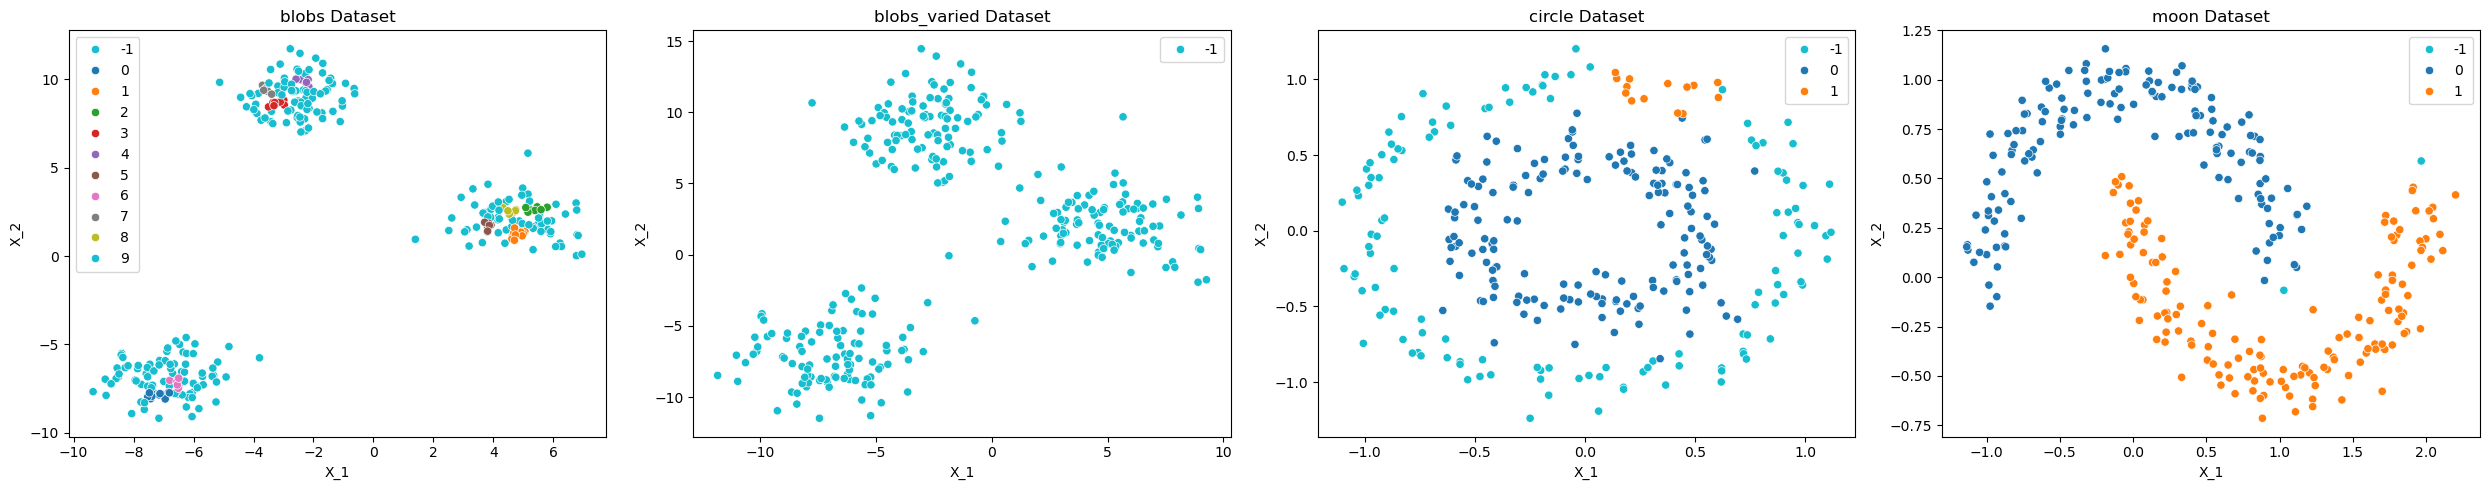

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# fit
for key, model in dbscan_list.items():
    model.fit(X[key])

# Plotting the data
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25, 5))

# Loop through each dataset and plot the clustering result
for i, (col, data) in enumerate(X.items()):
    # Get DBSCAN labels
    labels = dbscan_list[col].labels_
    
    # Create a simple color palette for the labels
    unique_labels = set(labels)
    palette = {label: f"C{label % 10}" for label in unique_labels}  # Simple cycle of colors
    
    # Plot the data with the appropriate labels
    sns.scatterplot(x=data["X_1"], y=data["X_2"], hue=labels, palette=palette, ax=ax[i])

    # Set title for each subplot
    ax[i].set_title(f"{col} Dataset")

# Adjust layout
plt.tight_layout()
plt.show()